# 7: Simon algorithm

In [1]:
from renom_q import *

For the $n$-bit function $f(x)$ that is promised to have a secret key $s$ that satisfies the $n$-bit variable $x$ and 

$$f(x) = f(x \oplus s),$$

the Simon problem is a problem of finding the secret key $s$.
$$x \oplus s = (x_0 \oplus s_0, x_1 \oplus s_1, \dots, x_{n-1} \oplus s_{n-1})$$

$$\left| x_0 x_1 \right\rangle\left| 00 \right\rangle \xrightarrow{U_f} \left| x_0 x_1 \right\rangle\left| 00 \oplus f(x_0 x_1) \right\rangle = \left| x_0 x_1 \right\rangle\left| f(x_0 x_1) \right\rangle$$

When $n = 2$, the function table with the secret key $s$ other than 0 becomes as follows. The function value is arbitrary.

- In case of $s=01$

|$x$|f(x)|
|:-:|:-:|
|00|1|
|01|1|
|10|0|
|11|0|

- In case of $s=10$

|$x$| f(x)|
|:-:|:-:|
|00|1|
|01|2|
|10|1|
|11|2|

- In case of $s=11$

|$x$| f(x)|
|:-:|:-:|
|00|1|
|01|3|
|10|3|
|11|1|

## Example1: the secret key $s=3=11_{(2)}$

{'00': 523, '11': 501}


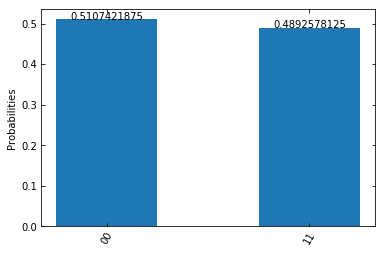

In [2]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x0, f_x0)
    qci.cx(x1, f_x0)
    
bn = 4
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])

s_oracle(qc, q[0], q[1], q[2], q[3])

for i in range(2):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)

$\left| y \right\rangle = \left| 00 \right\rangle$ and $\left| y \right\rangle = \left| 11 \right\rangle$ are observed. If $\left| 11 \right\rangle$, the secret key 𝑠 is obtained from the following expression.

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=11$$

## Example2: the secret key $s=1=01_{(2)}$

{'00': 498, '10': 526}


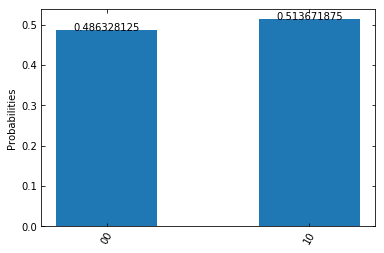

In [3]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x0, f_x1)
    
bn = 4 
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])

s_oracle(qc, q[0], q[1], q[2], q[3])

for i in range(2):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)

$\left| y \right\rangle = \left| 00 \right\rangle$ and $\left| y \right\rangle = \left| 10 \right\rangle$ are observed. If $\left| 10 \right\rangle$, the secret key 𝑠 is obtained from the following expression.

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=01$$

## Example3: the secret key $s=2=10_{(2)}$

{'00': 515, '01': 509}


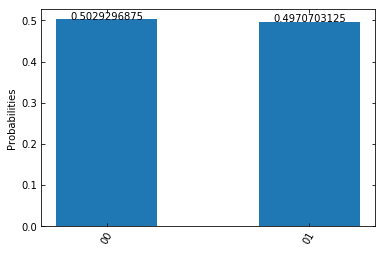

In [4]:
def s_oracle(qci, x0, x1, f_x0, f_x1):
    qci.x(f_x1)
    qci.cx(x1, f_x0)
    
bn = 4
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

for i in range(2):
    qc.h(q[i])

s_oracle(qc, q[0], q[1], q[2], q[3])

for i in range(2):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)

$\left| y \right\rangle = \left| 00 \right\rangle$ and $\left| y \right\rangle = \left| 01 \right\rangle$ are observed. If $\left| 01 \right\rangle$, the secret key 𝑠 is obtained from the following expression.

$$y \cdot s = (y_0 s_0) \oplus (y_1 s_1) = 0$$

$$\rightarrow s=10$$